**Ph 22 Assignment 1 (Set 2)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#copy-pasted from my ph 20 set 4
def euler_SHO(tN, x0, v0, N):
    h = tN / N
    x_i = np.zeros(N)
    v_i = np.zeros(N)
    
    x_i[0] = x0
    v_i[0] = v0
    
    for i in range(N-1):
        x_i[i+1] += x_i[i] + (h * v_i[i])
        v_i[i+1] += v_i[i] - (h * x_i[i])
    
    return x_i, v_i

#also copy-pasted
def GE_euler(tN, x0, v0, N):
    h = tN/N
    xi = euler_SHO(tN, x0, v0, N)[0]
    vi = euler_SHO(tN, x0, v0, N)[1]
    x_a = np.zeros(N)
    v_a = np.zeros(N)
    x_diff = np.zeros(N)
    v_diff = np.zeros(N)
    
    for i in range(N):
        x_a[i] = v0 * np.sin(i*h) + x0 * np.cos(i*h)
        x_diff[i] = x_a[i] - xi[i]
        
        v_a[i] = v0 * np.cos(i*h) - x0 * np.sin(i*h)
        v_diff[i] = v_a[i] - vi[i]
    
    return x_diff, v_diff

def midpoint_SHO(tN, x0, v0, N):
    h = tN / N
    x_i = np.zeros(N)
    v_i = np.zeros(N)
    
    x_i[0] = x0
    v_i[0] = v0
    
    for i in range(N-1):
        
        #last value, plus velocity*step width, plus a*(h^2)/2
        x_i[i+1] += x_i[i] + (h * v_i[i]) - ((h**2) * x_i[i] / 2)
        v_i[i+1] += v_i[i] - (h * x_i[i]) - ((h**2) * v_i[i] / 2)
        #last value, plus h*a, plus (a')*(h^2)/2
    
    return x_i, v_i

def GE_midpoint(tN, x0, v0, N):
    h = tN/N
    xi = midpoint_SHO(tN, x0, v0, N)[0]
    vi = midpoint_SHO(tN, x0, v0, N)[1]
    x_a = np.zeros(N)
    v_a = np.zeros(N)
    x_diff = np.zeros(N)
    v_diff = np.zeros(N)
    
    for i in range(N):
        x_a[i] = v0 * np.sin(i*h) + x0 * np.cos(i*h)
        x_diff[i] = x_a[i] - xi[i]
        
        v_a[i] = v0 * np.cos(i*h) - x0 * np.sin(i*h)
        v_diff[i] = v_a[i] - vi[i]
    
    return x_diff, v_diff

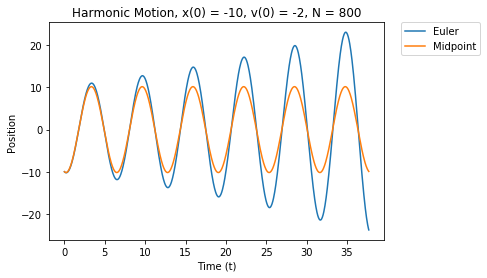

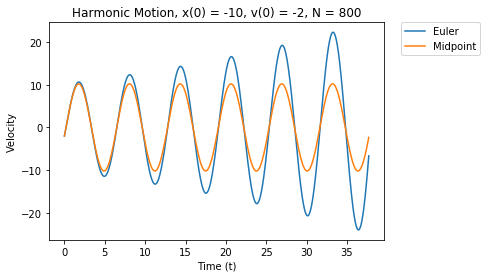

In [5]:
t1 = np.linspace(0, 12*np.pi, 800)
t2 = np.linspace(0, 12*np.pi, 3000)

plt.figure()

plt.plot(t1,euler_SHO(12*np.pi,-10,-2,800)[0],label='Euler')
plt.plot(t1,midpoint_SHO(12*np.pi,-10,-2,800)[0],label='Midpoint')

plt.xlabel("Time (t)")
plt.ylabel("Position")
plt.title("Harmonic Motion, x(0) = -10, v(0) = -2, N = 800")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure()

plt.plot(t1,euler_SHO(12*np.pi,-10,-2,800)[1], label='Euler')
plt.plot(t1,midpoint_SHO(12*np.pi,-10,-2,800)[1],label='Midpoint')

plt.xlabel("Time (t)")
plt.ylabel("Velocity")
plt.title("Harmonic Motion, x(0) = -10, v(0) = -2, N = 800")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

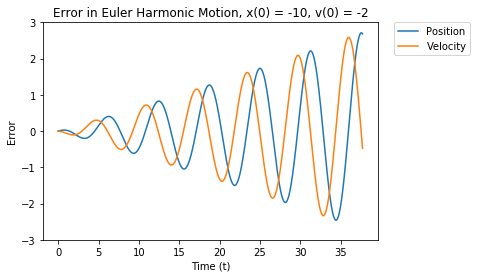

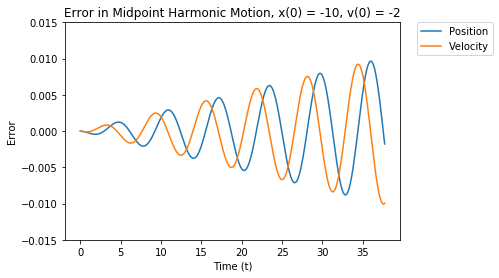

In [11]:
plt.figure()

plt.plot(t2, GE_euler(12*np.pi, -10, 2, 3000)[0], label='Position')
plt.plot(t2, GE_euler(12*np.pi, -10, 2, 3000)[1], label='Velocity')
plt.xlabel("Time (t)")
plt.ylabel("Error")
plt.title("Error in Euler Harmonic Motion, x(0) = -10, v(0) = -2")
plt.ylim(-3,3)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure()

plt.plot(t2, GE_midpoint(12*np.pi, -10, 2, 3000)[0], label='Position')
plt.plot(t2, GE_midpoint(12*np.pi, -10, 2, 3000)[1], label='Velocity')
plt.xlabel("Time (t)")
plt.ylabel("Error")
plt.title("Error in Midpoint Harmonic Motion, x(0) = -10, v(0) = -2")
plt.ylim(-0.015,0.015)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The scales on these are wildly different. In fact, they're over two orders of magnitude different. Now to change the step size:

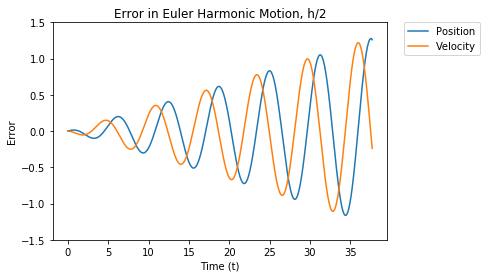

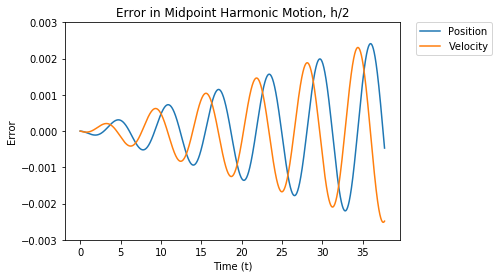

In [17]:
t3 = np.linspace(0, 12*np.pi, 6000)

plt.figure()

plt.plot(t3, GE_euler(12*np.pi, -10, 2, 6000)[0], label='Position')
plt.plot(t3, GE_euler(12*np.pi, -10, 2, 6000)[1], label='Velocity')
plt.xlabel("Time (t)")
plt.ylabel("Error")
plt.title("Error in Euler Harmonic Motion, h/2")
plt.ylim(-1.5,1.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure()

plt.plot(t3, GE_midpoint(12*np.pi, -10, 2, 6000)[0], label='Position')
plt.plot(t3, GE_midpoint(12*np.pi, -10, 2, 6000)[1], label='Velocity')
plt.xlabel("Time (t)")
plt.ylabel("Error")
plt.title("Error in Midpoint Harmonic Motion, h/2")
plt.ylim(-0.003,0.003)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

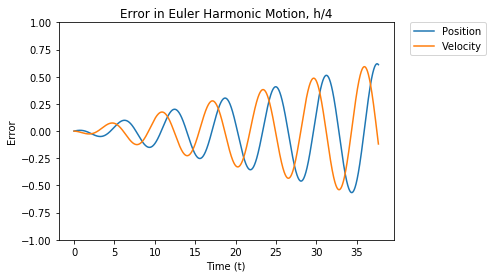

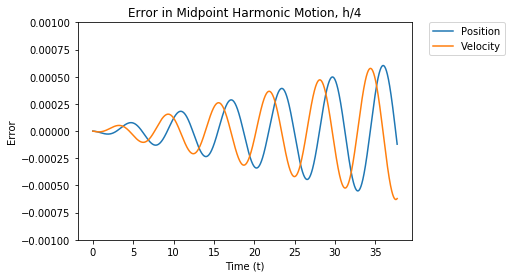

In [20]:
t4 = np.linspace(0, 12*np.pi, 12000)

plt.figure()

plt.plot(t4, GE_euler(12*np.pi, -10, 2, 12000)[0], label='Position')
plt.plot(t4, GE_euler(12*np.pi, -10, 2, 12000)[1], label='Velocity')
plt.xlabel("Time (t)")
plt.ylabel("Error")
plt.title("Error in Euler Harmonic Motion, h/4")
plt.ylim(-1,1)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure()

plt.plot(t4, GE_midpoint(12*np.pi, -10, 2, 12000)[0], label='Position')
plt.plot(t4, GE_midpoint(12*np.pi, -10, 2, 12000)[1], label='Velocity')
plt.xlabel("Time (t)")
plt.ylabel("Error")
plt.title("Error in Midpoint Harmonic Motion, h/4")
plt.ylim(-0.001,0.001)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

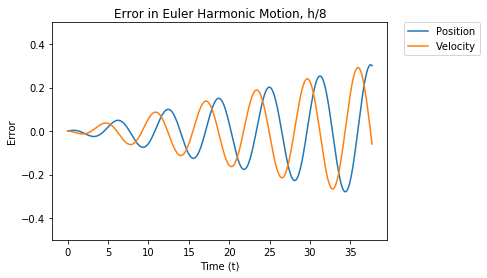

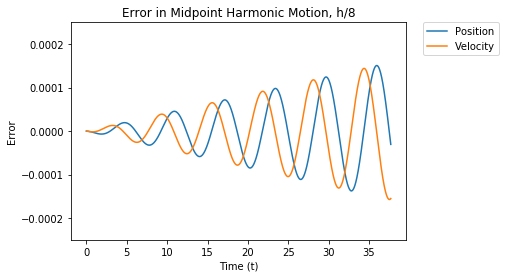

In [22]:
t5 = np.linspace(0, 12*np.pi, 24000)

plt.figure()

plt.plot(t5, GE_euler(12*np.pi, -10, 2, 24000)[0], label='Position')
plt.plot(t5, GE_euler(12*np.pi, -10, 2, 24000)[1], label='Velocity')
plt.xlabel("Time (t)")
plt.ylabel("Error")
plt.title("Error in Euler Harmonic Motion, h/8")
plt.ylim(-0.5,0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure()

plt.plot(t5, GE_midpoint(12*np.pi, -10, 2, 24000)[0], label='Position')
plt.plot(t5, GE_midpoint(12*np.pi, -10, 2, 24000)[1], label='Velocity')
plt.xlabel("Time (t)")
plt.ylabel("Error")
plt.title("Error in Midpoint Harmonic Motion, h/8")
plt.ylim(-0.00025,0.00025)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

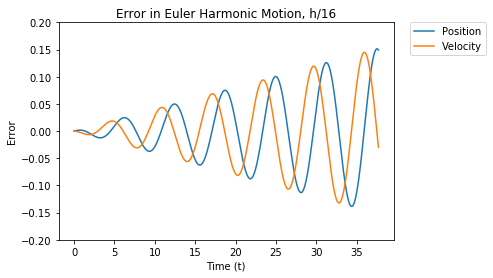

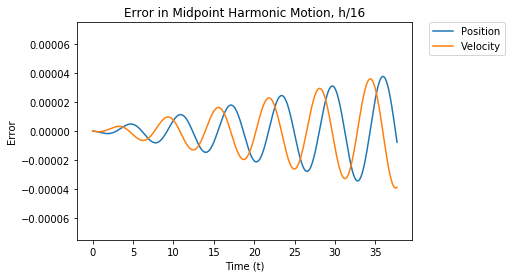

In [24]:
t6 = np.linspace(0, 12*np.pi, 48000)

plt.figure()

plt.plot(t6, GE_euler(12*np.pi, -10, 2, 48000)[0], label='Position')
plt.plot(t6, GE_euler(12*np.pi, -10, 2, 48000)[1], label='Velocity')
plt.xlabel("Time (t)")
plt.ylabel("Error")
plt.title("Error in Euler Harmonic Motion, h/16")
plt.ylim(-0.2,0.2)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure()

plt.plot(t6, GE_midpoint(12*np.pi, -10, 2, 48000)[0], label='Position')
plt.plot(t6, GE_midpoint(12*np.pi, -10, 2, 48000)[1], label='Velocity')
plt.xlabel("Time (t)")
plt.ylabel("Error")
plt.title("Error in Midpoint Harmonic Motion, h/16")
plt.ylim(-0.000075,0.000075)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

It looks like midpoint error is going down by a factor of about 4 per halving of h, whereas euler method's error appears to be about halving when halving h.

Now, on to runge-kutta:

In [33]:
def rungekutta(xilist, t, h, fx):
    
    vec = np.array(xilist)
    
    k1 = np.array(h * fx(vec,t))
    vec1 = vec + (k1 / 2)
    
    k2 = np.array(h * fx(vec1, t + h/2))
    vec2 = vec + (k2 / 2)
    
    k3 = np.array(h * fx(vec2, t + h/2))
    vec3 = vec + k3
    
    k4 = np.array(h * fx(vec3, t + h))
    
    
    newvec = vec + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
    
    return(newvec)

def rkstepper(xilist, tarray, h, fx):
    
    xicurrent = []
    xicurrent.append(xilist)
    
    for i, time in enumerate(tarray):
        
        xinew = rungekutta(xicurrent[i], time, h, fx)
        xicurrent.append(xinew)
    
    return(xicurrent)

In [36]:
def orbitstep(xilist, t):
    x, y, vx, vy = xilist
    r = np.sqrt(x**2 + y**2)
    
    ax = -1 * x / (r**3)
    ay = -1 * y / (r**3)
    
    array = np.array([vx, vy, ax, ay])
    return(array)

In [53]:
circtime = np.linspace(0,1000,1000)

#set initial conditions to v_tot = 1/Sqrt(r)
#if x_0 = 0, r_0 = y_0, so v_tot_0 = Sqrt(y_0)
circorbit = np.transpose(rkstepper([0, 1, 1, 0], circtime, 0.01, orbitstep))




(-1.0999969876690021,
 1.0999995242231169,
 -1.0999986679778726,
 1.099999936570375)

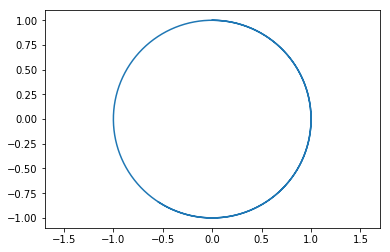

In [54]:
plt.plot(circorbit[0],circorbit[1])
plt.axis('equal')

A circle, as desired :)